In [1]:
import json
with open('summary/summary1.txt', 'r') as f:
    summary = json.load(f)

In [3]:
import pandas as pd
data = pd.DataFrame(summary)
data.dtypes

t2         float64
T          float64
T-tilde    float64
psi        float64
dtype: object

In [5]:
summary_dict = {}
measures = ['T', 'T-tilde', 'psi']
for m in measures:
    summary_dict[m] = ['mean', 'std', 'count']

result = data.groupby(['t2'], as_index=False).agg(summary_dict)
result

t2         T                   T-tilde                  \
                      mean       std count      mean       std count   
0  -4.000000e+00  1.113136  0.001006   100  0.940043  0.021844   100   
1  -3.600000e+00  1.116707  0.000974   100  0.964128  0.027941   100   
2  -3.200000e+00  1.119791  0.000996   100  0.924305  0.031942   100   
3  -2.800000e+00  1.121955  0.001122   100  0.883809  0.095384   100   
4  -2.400000e+00  1.122868  0.001352   100  0.968639  0.025453   100   
5  -2.000000e+00  1.122410  0.001628   100  0.804120  0.018402   100   
6  -1.600000e+00  1.120708  0.001884   100  0.970078  0.021929   100   
7  -1.200000e+00  1.117850  0.002090   100  0.880668  0.060880   100   
8  -8.000000e-01  1.113933  0.002240   100  0.938081  0.055795   100   
9  -4.000000e-01  1.109255  0.002337   100  0.968217  0.024269   100   
10 -8.881784e-16  1.104253  0.002384   100  0.938296  0.046450   100   
11  4.000000e-01  1.099313  0.002396   100  0.966261  0.025489   100   
12  8.000000e-01  1.094651  0.002384   100  0.966916  0.025356   100   
13  1.200000e+00  1.090331  0.002361   100  0.966990  0.025281   100   
14  1.600000e+00  1.086393  0.002342   100  0.967531  0.025261   100   
15  2.000000e+00  1.083020  0.002346   100  0.967235  0.025375   100   
16  2.400000e+00  1.080432  0.002385   100  0.966734  0.025424   100   
17  2.800000e+00  1.078606  0.002466   100  0.967348  0.025322   100   
18  3.200000e+00  1.077396  0.002595   100  0.967610  0.025441   100   
19  3.600000e+00  1.076693  0.002779   100  0.968345  0.025531   100   
20  4.000000e+00  1.076417  0.003031   100  0.971090  0.025636   100   

         psi                  
        mean       std count  
0   0.359930  0.093955   100  
1   0.352176  0.090253   100  
2   0.347857  0.090802   100  
3   0.305475  0.084144   100  
4   0.304757  0.082533   100  
5   0.300013  0.085450   100  
6   0.292119  0.088816   100  
7   0.292791  0.088745   100  
8   0.329074  0.104451   100  
9   0.328471  0.104450   100  
10  0.344254  0.112917   100  
11  0.360273  0.110622   100  
12  0.360223  0.112370   100  
13  0.360264  0.112413   100  
14  0.359339  0.113984   100  
15  0.359144  0.114001   100  
16  0.358908  0.113802   100  
17  0.362175  0.114678   100  
18  0.361917  0.114684   100  
19  0.361917  0.114684   100  
20  0.362751  0.114750   100

In [ ]:
x1 = np.random.binomial(d, 0.5, size = (n, 1))
x2 = np.random.binomial(1, 0.5, size = (n, 1))
x = np.concatenate((x1, x2), axis = 1)

b = np.array([[1, 0]])
p = 1/(1 + np.exp(- x @ b.T + d/2)).reshape((-1,))
y = np.random.binomial(1, p, size = (n, ))

In [32]:
import numpy as np
n = 1000
y = np.random.binomial(1, 0.5, size = (n, 1))
g = np.random.binomial(1, 0.05, size = (n, 1))
x0 = np.random.binomial(4, 0.5, size = (n, 1))/8 * (2 * y - 1) * (2 * g - 1) + 1.5 * (2 * g - 1)
x1 = np.random.binomial(4, 0.5, size = (n, 1))
x = np.concatenate((x0, x1), axis = 1)
x.shape

(1000, 2)

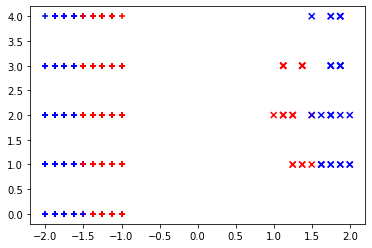

In [33]:
import matplotlib.pyplot as plt
y = y.reshape((-1,))
g = g.reshape((-1,))
colors = ['red', 'blue']
markers = ['+', 'x']
col = np.array([colors[_] for _ in list(y)], dtype = 'str')
# mark = [markers[_] for _ in list(g.reshape((-1,)))]
plt.scatter(x0[g == 0], x1[g == 0], color = col[g ==0], marker=markers[0])
plt.scatter(x0[g == 1], x1[g == 1], color = col[g==1], marker=markers[1])

In [36]:
import itertools
ITER = 100
theta2 = [(0.4 * _ - 4) for _ in range(21)]

pars = list(itertools.product(range(ITER), theta2))
len(pars)

2100